# **HR Analytics: Employee Promotion Data**

**Muhammad Ghifari Ramadhani**  
**JCDSOL-011-022**

## Business Problem Understanding

**Context**  
Sebuah perusahaan multinasional besar mempunyai 9 vertikal yang luas di seluruh organisasinya. Salah satu masalahnya adalah mengidentifikasi orang-orang yang tepat untuk promosi (hanya untuk posisi manajer ke bawah) dan mempersiapkan mereka tepat waktu. 
Promosi akhir hanya diumumkan setelah evaluasi dan hal ini menyebabkan penundaan transisi ke peran baru. Oleh karena itu, perusahaan memerlukan bantuan dalam mengidentifikasi kandidat yang memenuhi syarat pada checkpoint tertentu sehingga mereka dapat mempercepat seluruh siklus promosi.

Target :

0 : Tidak mendapatkan promosi

1 : Mendapatkan promosi

**Problem Statement :**

Mendapatkan sebuah promosi bagi seorang karyawan merupakan hal yang sangat membanggakan, namun prosesnya akan memakan waktu yang lama apabila perusahaan menargetkan semua karyawan tanpa melakukan penyaringan terlebih dahulu. Perusahaan ingin meningkatkan efisiensi waktu dan meningkatkan presisi pada target karyawan yang terbukti bahwa ia layak mendapatkan promosi jika dilihat dari kontribusinya selama bekerja dibawah perusahaan tersebut.

Jika mengadakan promosi tetapi tanpa dilihat tingkat presisi pada target karyawan yang layak mendapatkannya, resikonya fatal apabila seorang karyawan yang tidak selayaknya dipromosi namun mendapatkan promosi tersebut yang dapat berdampak besar kepada perusahaan tersebut.

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang karyawan yang layak untuk mendapatkan promosi pada perusahaan tersebut, sehingga dapat meminimalisir terjadinya dampak resiko tersebut.

Dan juga, perusahaan ingin mengetahui faktor apa yang dimiliki karyawan sebelumnya yang telah mendapatkan promosi agar dapat ditinjau juga untuk promosi karyawan yang berikutnya.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan karyawan yang layak mendapatkan promosi dan tidak layak mendapatkan promosi.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang karyawan yang mendapatkan promosi dan tidak.

**Metric Evaluation**

<img src='table.png'>

Type 1 error : False Positive  
Konsekuensi: Berdampak besar kepada perusahaan karena telah mempromosikan karyawan yang seharusnya tidak layak untuk di promosi.

Type 2 error : False Negative  
Konsekuensi: Kehilangan calon karyawan yang layak untuk di promosi

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi error dalam memprediksi karyawan mana yang layak untuk dipromosikan. Metric utama yang digunakan adalah Precision-Recall. 


Dataset Source : https://www.kaggle.com/datasets/arashnic/hr-ana  
Note :  
- Dataset imbalanced

## <center>**Data Description**</center>

<center><table><center>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee</td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import plotnine as p9
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report,r2_score 

In [3]:
# Load Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# Dataframe dari dataset train
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


In [5]:
# Dataframe dari dataset test
test.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,0,76


In [6]:
# Shape dari test dan train
print("Shape of training data: ",train.shape)
print("Shape of testing data: ",test.shape)

Shape of training data:  (54808, 13)
Shape of testing data:  (23490, 12)


Dapat dilihat bahwa jumlah baris dan kolom pada tiap dataset adalah sebagai berikut.

In [7]:
# Statistika Deskriptif data train
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [8]:
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [9]:
# Statistika Deskriptif data test
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


In [10]:
test.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,23490,23490,22456,23490,23490
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7315,5299,15578,16596,13078


# **Data Cleaning**

Terdapat data yang hilang / missing values pada dua kolom tersebut yaitu education dan previous_year_rating. Dikarenakan persentase missing value rendah, maka akan kita impute menggunakan metode mode.

In [11]:
# Menghitung total missing values pada train dataset
train_count = train.isnull().sum() 
train_count

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
# Menghitung total missing values pada test dataset
test_count = test.isnull().sum()
test_count

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [13]:
## Melihat persentase missing values kedua data
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2) 
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)
print("Percentage of missing train data:\n",train_percent)
print("Percentage of missing test data:\n ",test_percent)

Percentage of missing train data:
 employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64
Percentage of missing test data:
  employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.71
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
dtype: float64


Terlihat bahwa persentase missing values pada tiap dataset memiliki range 4% - 8%, maka akan diimpute saja missing values tersebut.

## Imputing Missing Values


In [14]:
# Imputing missing values di education dan previous_year_rating dengan mode
train['education'] = train['education'].fillna(train['education'].mode()[0])
#Filling missing values in previous_year_rating column with mode 
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

In [15]:
# Cek apakah sudah terganti
train_count = train.isnull().sum() 
train_count

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
# Imputing missing values di education dan previous_year_rating dengan mode
test['education'] = test['education'].fillna(test['education'].mode()[0])
#Filling missing values in previous_year_rating column with mode 
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

In [17]:
# Cek apakah sudah terganti
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

Sudah dapat dilihat bahwa tidak ada data lagi yang memiliki missing values, oleh karena itu impute dinyatakan telah berhasil mengisi missing values tersebut.

In [18]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

DType masih ada yang object, oleh karena itu akan diubah menjadi category.

In [19]:
# Convert kolom objek menjadi category dari train data
list_str_obj_cols = train.columns[train.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    train[str_obj_col] = train[str_obj_col].astype("category")
train.dtypes

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
dtype: object

In [20]:
# Convert kolom objek menjadi category dari test data
list_str_obj_cols = test.columns[test.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    test[str_obj_col] = test[str_obj_col].astype("category")
test.dtypes

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
awards_won?                int64
avg_training_score         int64
dtype: object

Semua dtype yang awalnya object telah diubah menjadi category.

In [21]:
# Lihat apakah ada yang duplikat
condition = bool(train.duplicated(subset = 'employee_id').any())

if condition:
    print('There are duplicate employee IDs')
else:
    print('No duplicate employee IDs')

No duplicate employee IDs


In [22]:
# Lihat apakah ada yang duplikat
condition = bool(test.duplicated(subset = 'employee_id').any())

if condition:
    print('There are duplicate employee IDs')
else:
    print('No duplicate employee IDs')

No duplicate employee IDs


Cek apakah ada data karyawan yang terduplikat dan ternyata tidak ada sama sekali.

# **EDA (Exploratory Data Analysis)**

In [23]:
# Melihat komposisi data dari yang terpromosi dan tidak
train.is_promoted.value_counts(normalize=True)

is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64

Terlihat bahwa proporsi sangat jauh (imbalanced), maka disini menggunakan undersampling / oversampling untuk membalancekan train dataset

**Univariate Analysis**


Text(0, 0.5, 'Count')

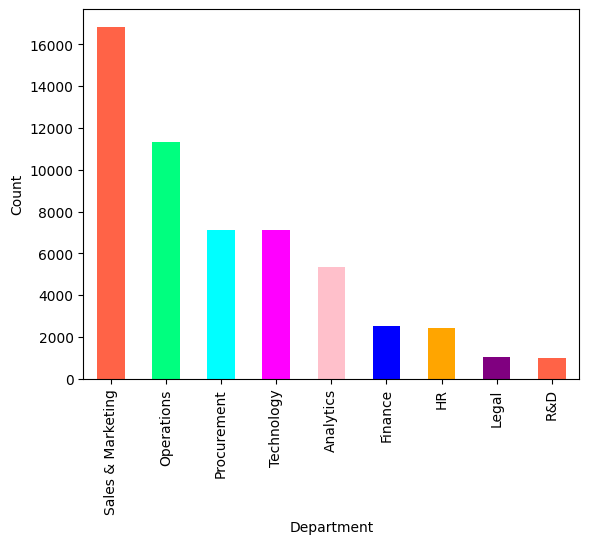

In [24]:
# Distribusi plot department 
department=train['department'].value_counts()
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
department.plot(kind='bar',color=c)
plt.xlabel("Department")
plt.ylabel("Count")

Berdasarkan tabel tersebut, dapat disimpulkan bahwa Sales & Marketing memiliki karyawan terbanyak.

Text(0, 0.5, 'Count')

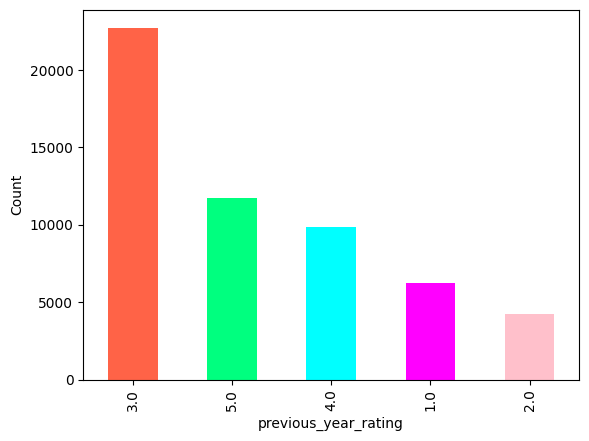

In [25]:
# Distribusi plot previous_year_rating
ratings=train['previous_year_rating'].value_counts()
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
ratings.plot(kind='bar',color=c)
plt.xlabel("previous_year_rating")
plt.ylabel("Count")

Berdasarkan tabel tersebut, dapat disimpulkan bahwa karyawan terbanyak memiliki rating 3.0.

Text(0, 0.5, 'Count')

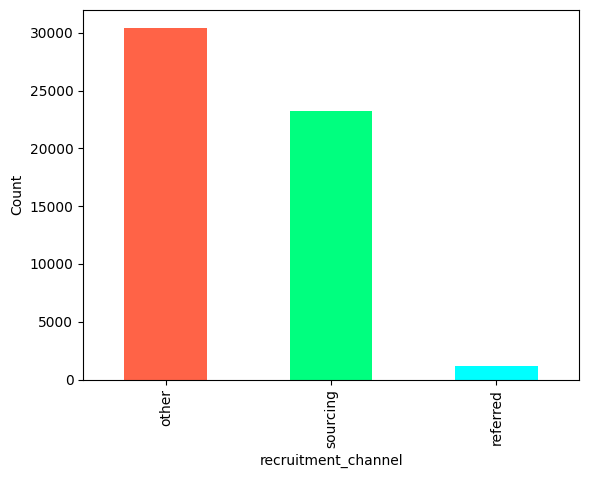

In [26]:
ratings=train['recruitment_channel'].value_counts()
c=['tomato','springgreen', 'aqua']
ratings.plot(kind='bar',color=c)
plt.xlabel("recruitment_channel")
plt.ylabel("Count")

Berdasarkan tabel tersebut, dapat disimpulkan bahwa karyawan memiliki recruitment_channel terbanyak pada other.

Text(0, 0.5, 'count')

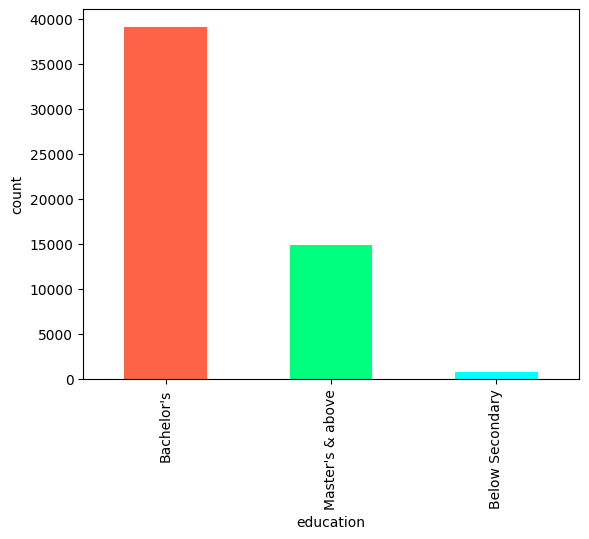

In [27]:
# Distribusi plot education
education=train['education'].value_counts()
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
education.plot(kind='bar',color=c)
plt.xlabel("education")
plt.ylabel("count")


Berdasarkan tabel tersebut, dapat disimpulkan bahwa mayoritas karyawan memiliki pendidikan terakhir sarjana / S1.

C:\Users\Ghifari\AppData\Local\Temp\ipykernel_6548\384470794.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
C:\Users\Ghifari\AppData\Local\Temp\ipykernel_6548\384470794.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


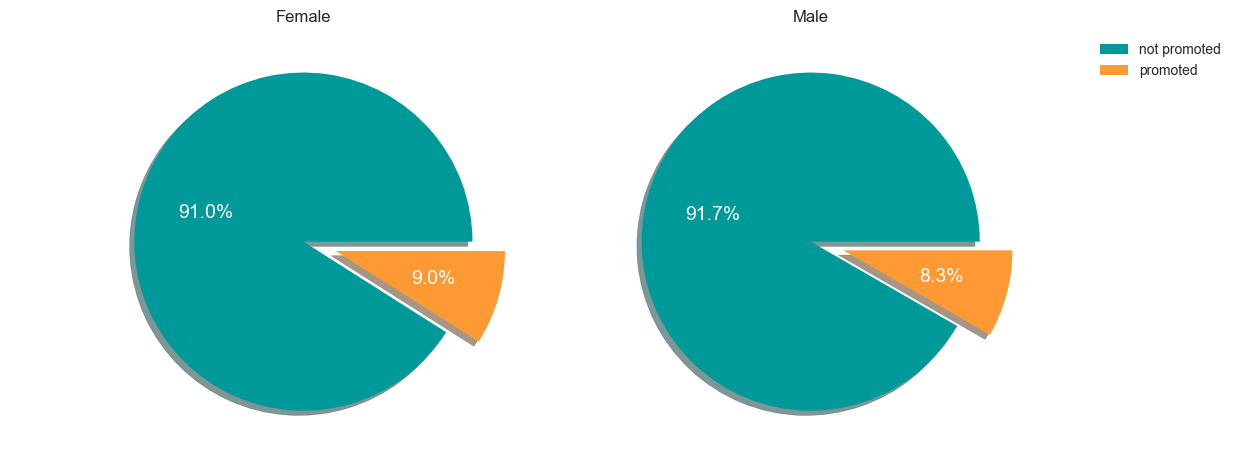

In [28]:
# Distribusi plot gender 
plt.style.use('seaborn')
plt.subplots(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(
    x=train[train.gender=='f'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Female")
plt.subplot(1,2,2)
plt.pie(
    x=train[train.gender=='m'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Male")
plt.legend(['not promoted','promoted'],loc='upper right', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

<Axes: xlabel='no_of_trainings', ylabel='count'>

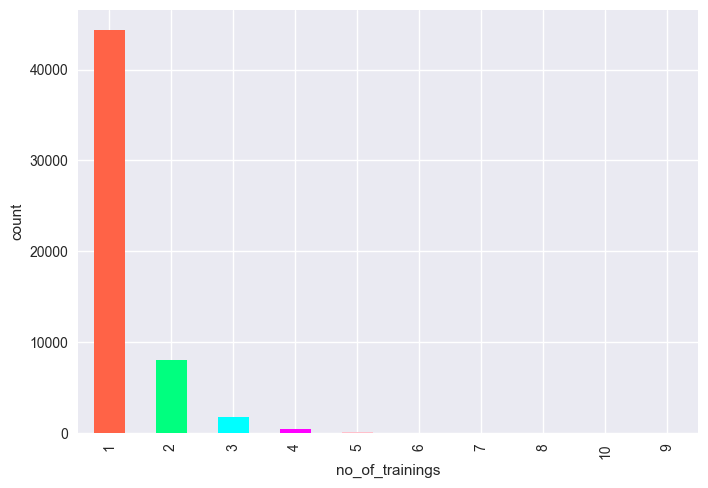

In [29]:
# Distribusi plot number_of_trainings
Number_of_trainings=train['no_of_trainings'].value_counts()
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
plt.xlabel('no_of_trainings')
plt.ylabel('count')
Number_of_trainings.plot(kind='bar',color=c)

Berdasarkan tabel tersebut, dapat disimpulkan bahwa karyawan terbanyak memiliki training rata-rata 1.

C:\Users\Ghifari\AppData\Local\Temp\ipykernel_6548\3527766572.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


<Axes: ylabel='Frequency'>

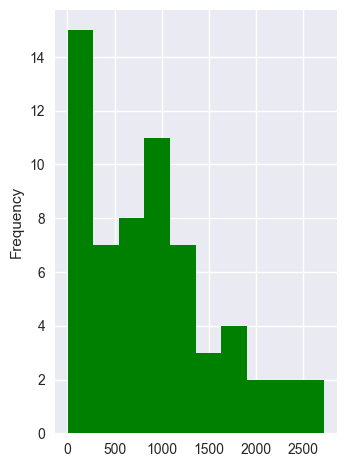

In [30]:
# Distribusi plot average_training_score
Average_training_score=train['avg_training_score'].value_counts()
plt.xlabel('avg_training_score')
plt.ylabel('count')
plt.subplot(1,2,2)
Average_training_score.plot(kind='hist',color='green')

Dari plot tersebut dapat dilihat bahwa mayoritas karyawan hanya memiliki satu training dan memiliki traning score 50.

Text(0.5, 0, 'Age Category')

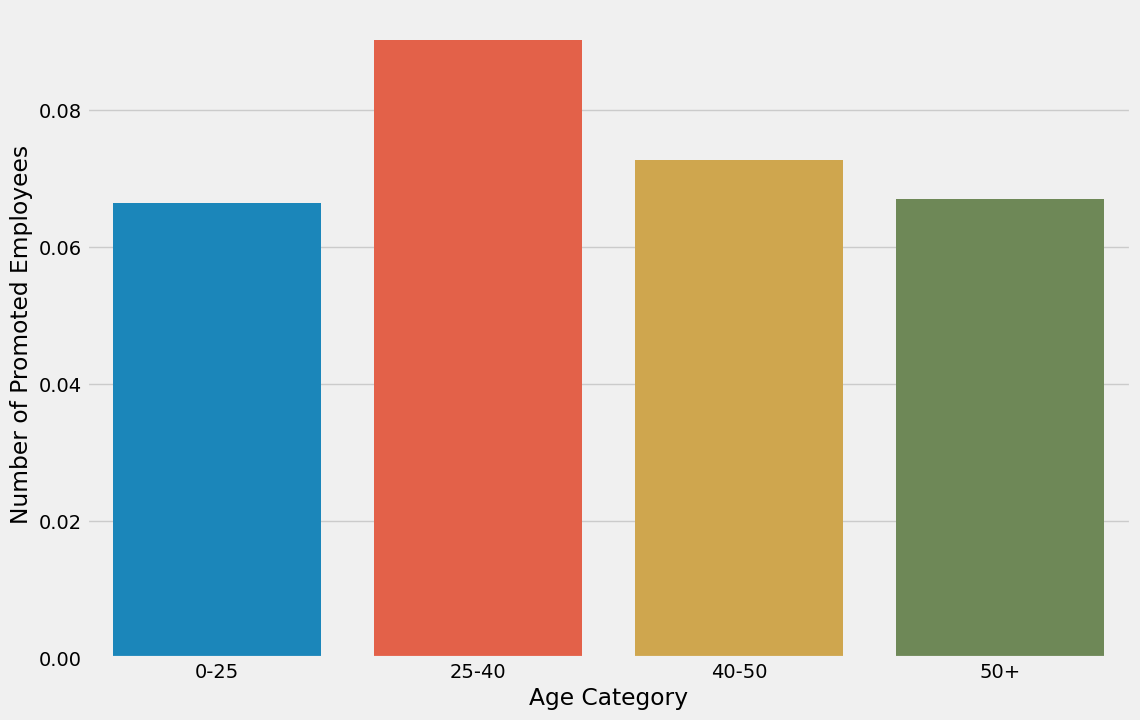

In [74]:
# Binning age agar tidak terlalu menyebar serta distribusi plotnya 
train['age_label'] = pd.cut(train.age,bins=[0,25,40,50,100],labels=['0-25','25-40','40-50','50+'])
train.head(5)
ages = train.pivot_table(values='is_promoted',index='age_label')
ages
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=ages.index,
    y=ages.is_promoted
)
plt.ylabel('Number of Promoted Employees')
plt.xlabel('Age Category')

Berdasarkan tabel tersebut, dapat disimpulkan bahwa mayoritas karyawan berusia 25-40 tahun.

is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64

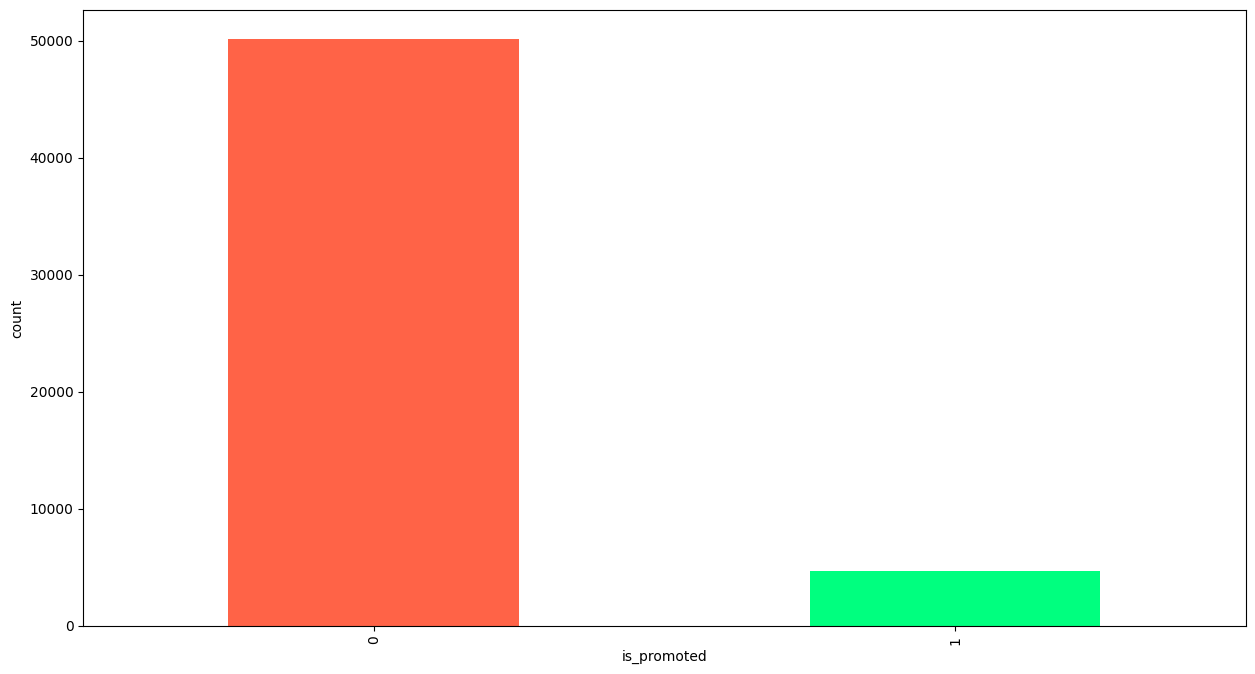

In [73]:
# Distribusi plot is_promoted
Number_of_trainings=train['is_promoted'].value_counts()
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
plt.xlabel('is_promoted')
plt.ylabel('count')
Number_of_trainings.plot(kind='bar',color=c)
train.is_promoted.value_counts(normalize=True)

Berdasarkan grafik tersebut dapat dilihat bahwa total karyawan yang tidak terpromosi berjumlah 50.140 dan karyawan yang terpromosi berjumlah 4668.

**Bivariate Analysis**

Text(0.5, 1.0, 'Distribution of age and is_promoted')

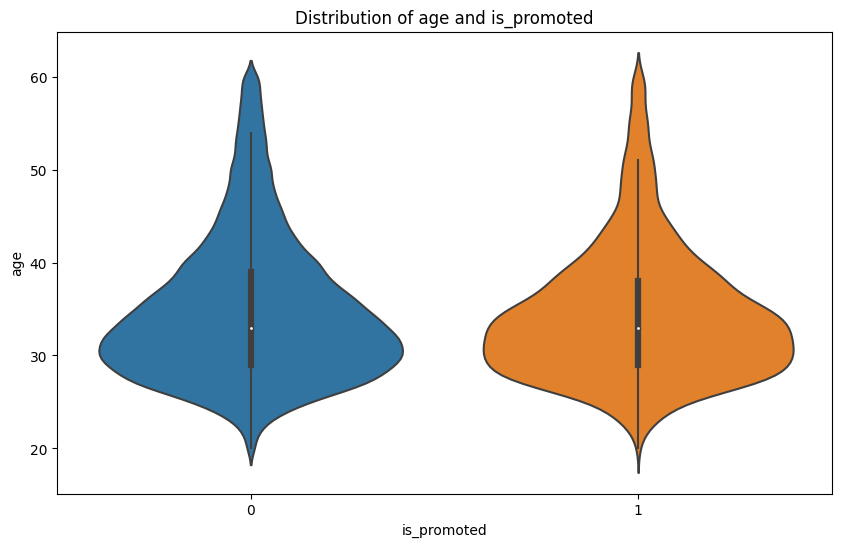

In [72]:
# Distribusi plot dari age dan is_promoted 
plt.figure(figsize=(10,6))
sns.violinplot(x=train["is_promoted"], y=train["age"], data=train)
plt.title('Distribution of age and is_promoted')

Dapat dilihat bahwa karyawan yang dipromosi maupun tidak dipromosi berada pada usia 30an.

Text(0, 0.5, 'Count')

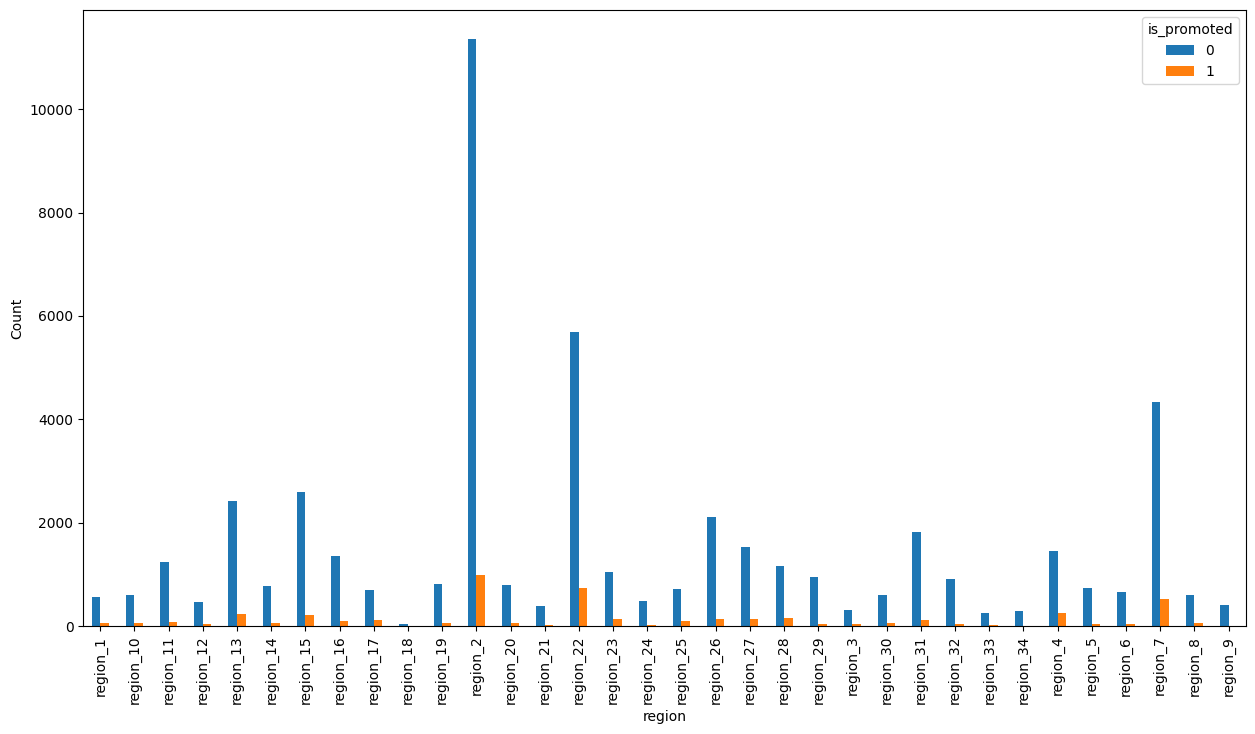

In [29]:
# Distribusi plot dari region dan is_promoted
gender=train['region']
is_promoted=train['is_promoted']
pd.crosstab(gender,is_promoted).plot(kind='bar')
plt.xlabel("region")
plt.ylabel("Count")

Dapat dilihat bahwa region_2 memiliki karyawan terbanyak yang terpromosi maupun tidak terpromosi.

Text(0, 0.5, 'Count')

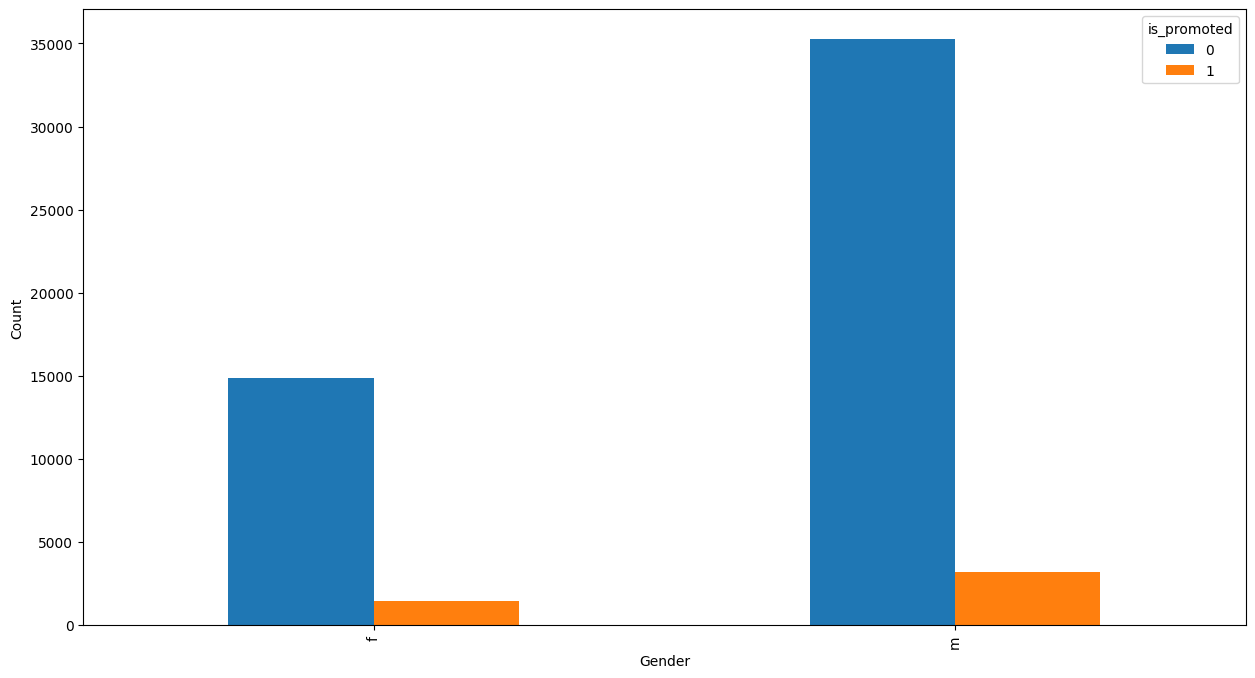

In [71]:
# Distribusi plot dari gender dan is_promoted
gender=train['gender']
is_promoted=train['is_promoted']
pd.crosstab(gender,is_promoted).plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")

Seperti yang terlihat pada barplot tersebut, karyawan pria dipromosikan lebih banyak dibandingkan karyawan wanita. Namun, tetap lebih banyak karyawan pria yang tidak mendapatkan promosi dibandingkan karyawan wanita.

<Axes: xlabel='previous_year_rating'>

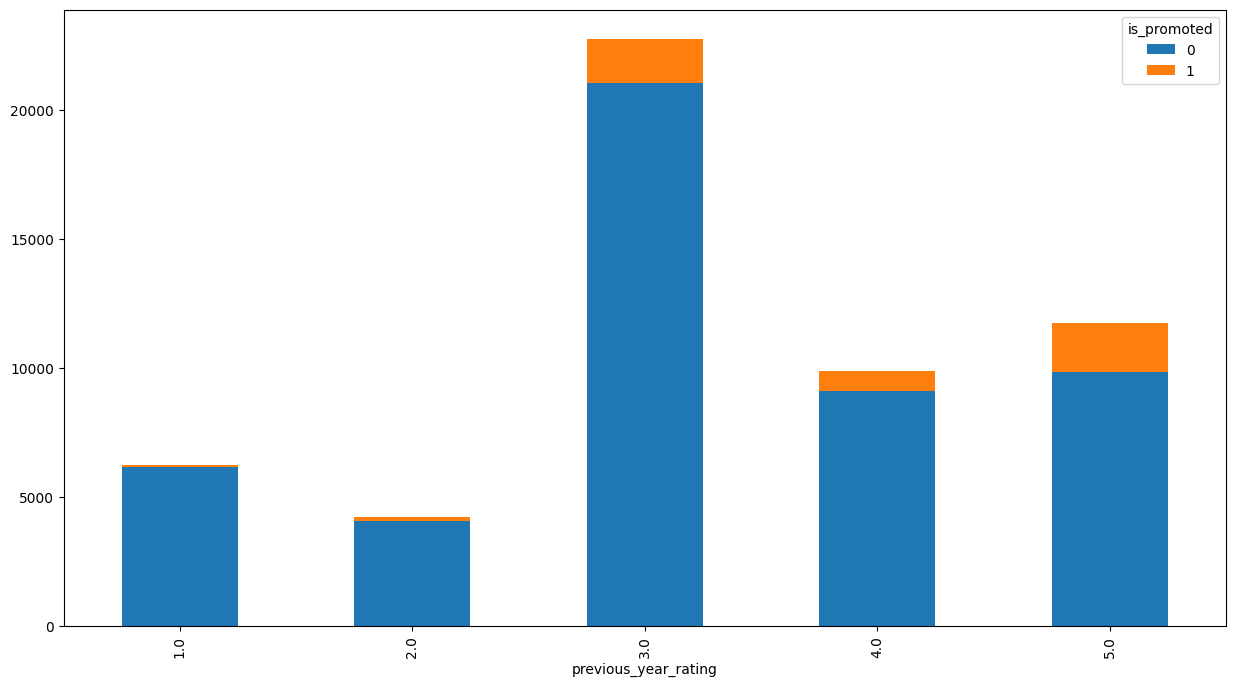

In [70]:
# Distribusi plot dari previous_year_rating dan is_promoted 
previous_year_rating=train['previous_year_rating']
promotion=train['is_promoted']
pd.crosstab(previous_year_rating,promotion).plot(kind='bar',stacked=True)

Mayoritas karyawan yang mendapatkan promosi adalah yang memiliki rating 3 keatas.

Text(0, 0.5, 'count')

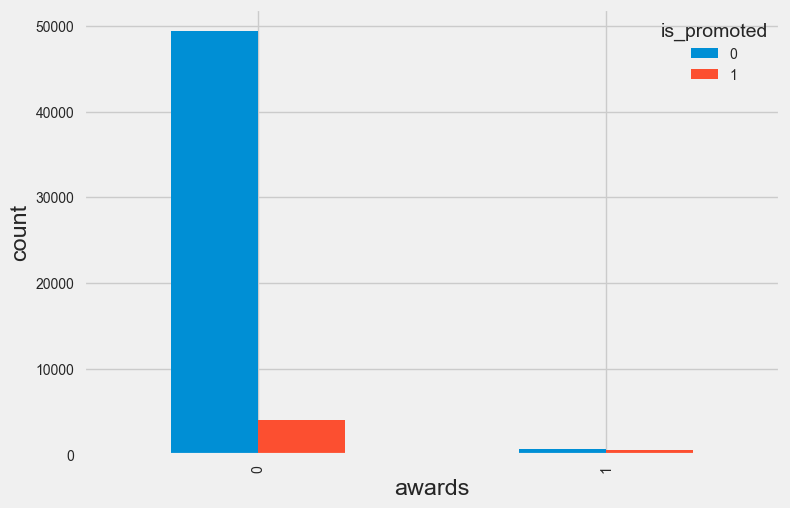

In [39]:
# Distribusi plot dari awards_won? dan is_promoted
awards=train['awards_won?']
is_promoted=train['is_promoted']
pd.crosstab(awards,is_promoted).plot(kind='bar')
plt.xlabel("awards")
plt.ylabel("count")

Berdasarkan barplot tersebut, lebih banyak karyawan yang tidak memiliki penghargaan yang dipromosi dibandingkan karyawan yang memiliki penghargaan.

Text(0, 0.5, 'count')

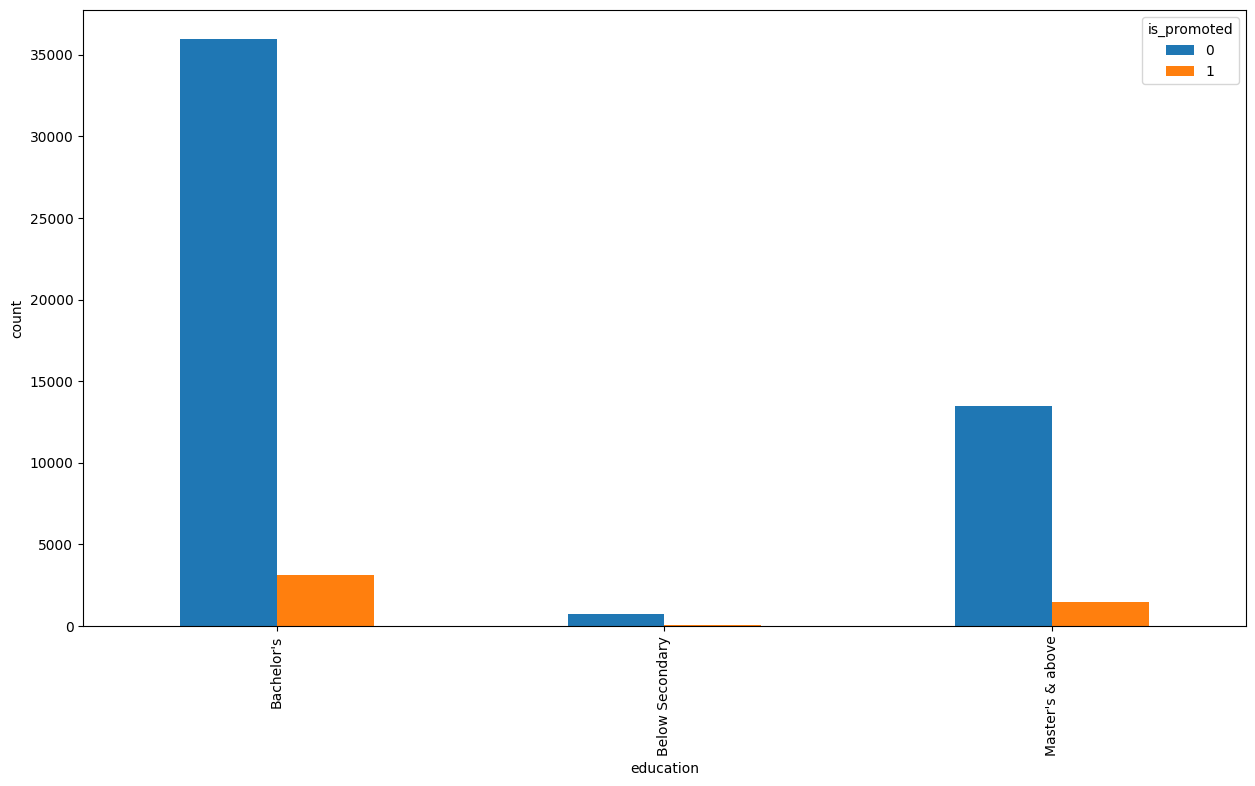

In [35]:
# Distribusi plot dari education dan is_promoted
education=train['education']
is_promoted=train['is_promoted']
pd.crosstab(education,is_promoted).plot(kind='bar')
plt.xlabel("education")
plt.ylabel("count")

Berdasarkan barplot tersebut, lebih banyak karyawan yang memiliki pendidikan terakhir S1/Sarjana yang mendapatkan promosi maupun yang tidak.

Text(0, 0.5, 'count')

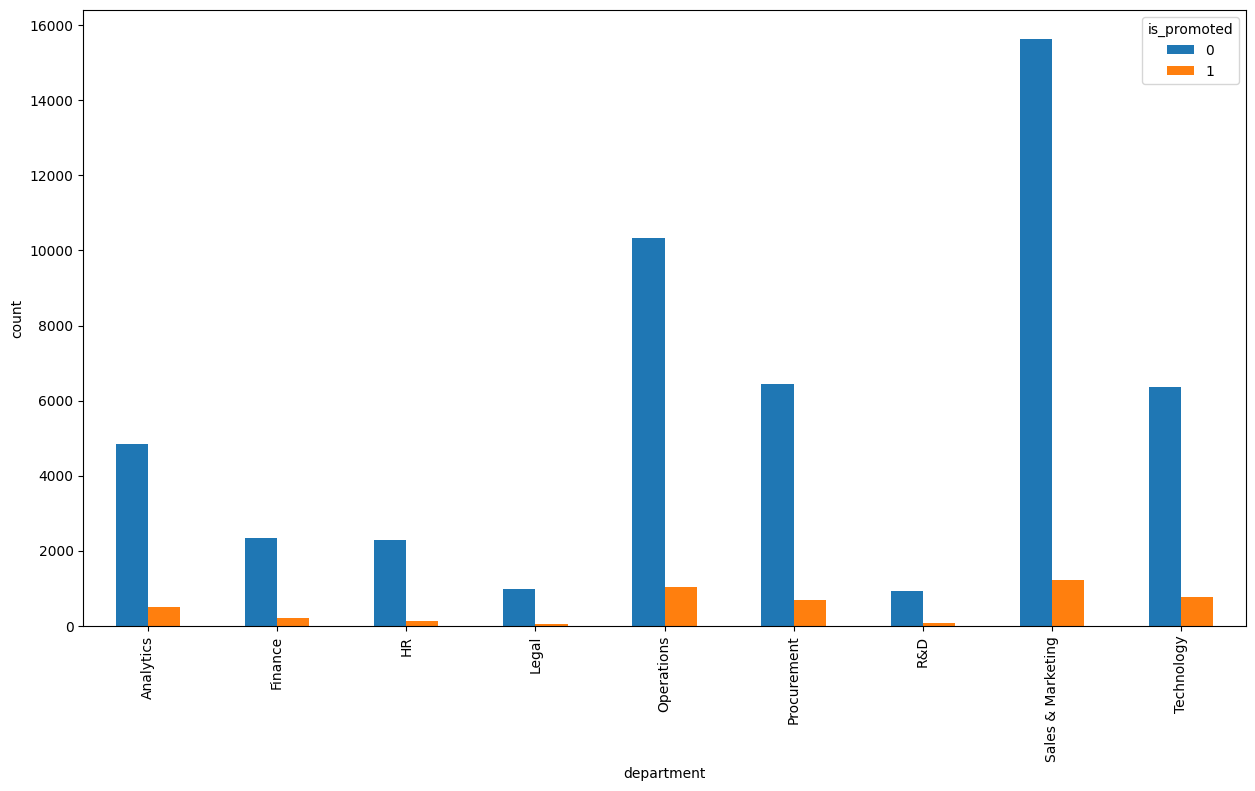

In [36]:
# Distribusi plot dari department dan is_promoted
department=train['department']
is_promoted=train['is_promoted']
pd.crosstab(department,is_promoted).plot(kind='bar')
plt.xlabel("department")
plt.ylabel("count")

Berdasarkan barplot tersebut, lebih banyak karyawan yang berada di departemen Sales & Marketing dan Operations yang memiliki tingkat promosi terbanyak dan pada departemen Sales & Marketing saja yang memiliki tingkat tidak terpromosi terbanyak.

Text(0, 0.5, 'count')

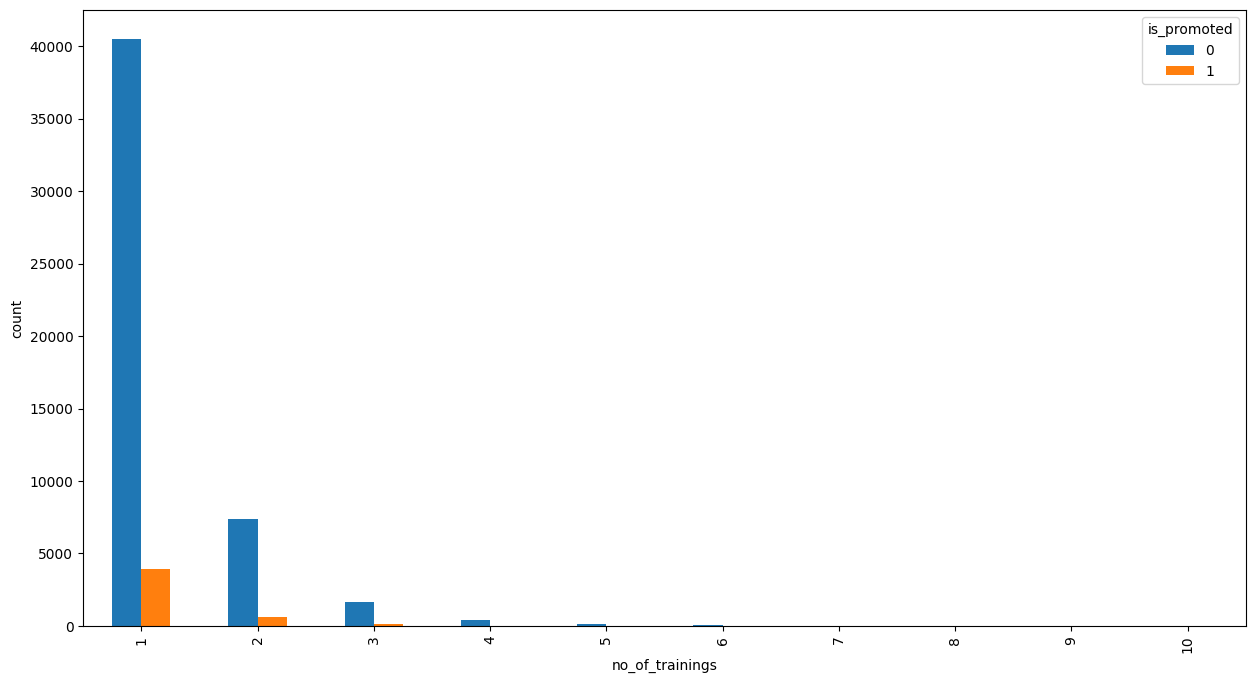

In [39]:
# Distribusi plot dari no_of_trainings dan is_promoted
no_of_trainings=train['no_of_trainings']
is_promoted=train['is_promoted']
pd.crosstab(no_of_trainings,is_promoted).plot(kind='bar')
plt.xlabel("no_of_trainings")
plt.ylabel("count")

Berdasarkan barplot tersebut, lebih banyak karyawan yang hanya memiliki training sekali yang mendapatkan promosi maupun tidak.

Text(0, 0.5, 'count')

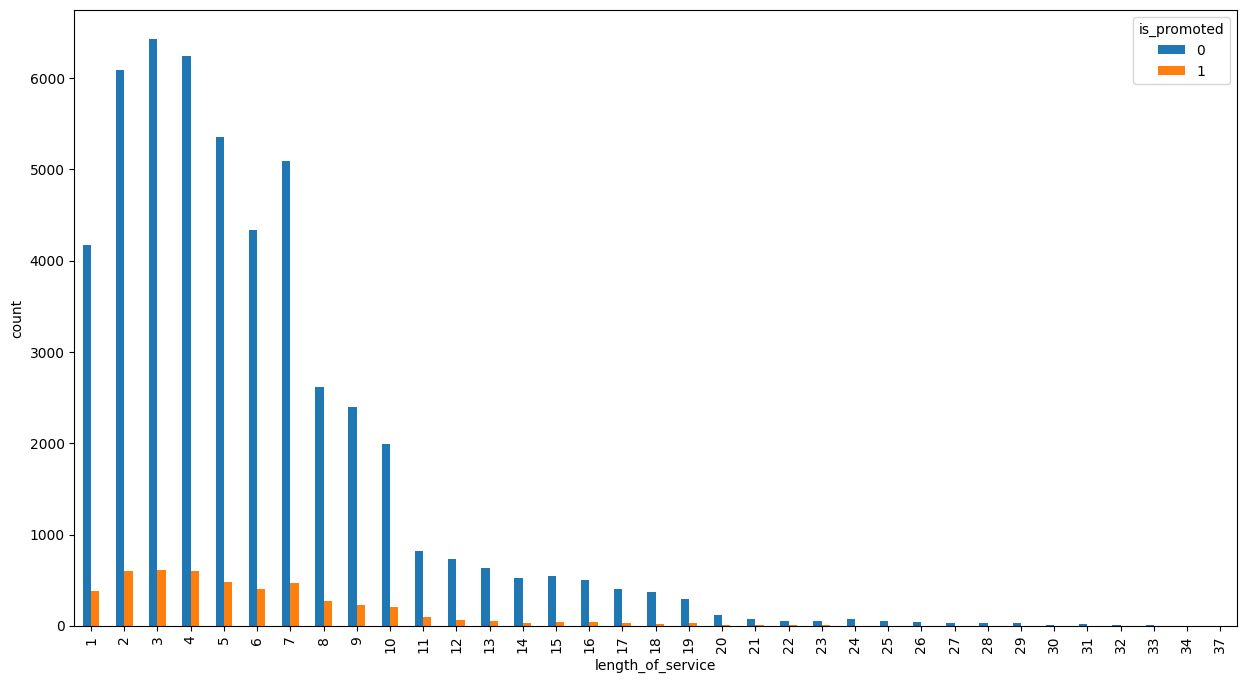

In [40]:
# Distribusi plot dari length_of_service dan is_promoted
length_of_service=train['length_of_service']
is_promoted=train['is_promoted']
pd.crosstab(length_of_service,is_promoted).plot(kind='bar')
plt.xlabel("length_of_service")
plt.ylabel("count")

Berdasarkan barplot tersebut, lebih banyak karyawan dengan jangka waktu kerja 3 tahun yang tidak mendapatkan promosi terbanyak dan pada jangka waktu 2-4 tahun yang mendapatkan promosi terbanyak.

In [68]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

**Feature Extraction**

In [75]:
# Remove kolom yang tidak dipakai agar tidak terlalu banyak kolom
train = train.drop(['recruitment_channel', 'region', 'employee_id','age_label'], axis = 1) 

test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [76]:
# Convert categorical data menjadi numerical menggunakan Encoder
le = LabelEncoder()
train['education']=le.fit_transform(train['education'])
test['education']=le.fit_transform(test['education'])
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department']) 
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])
print(train.head())
print(test.head())

   department  education  gender  no_of_trainings  age  previous_year_rating  \
0           7          2       0                1   35                   5.0   
1           4          0       1                1   30                   5.0   
2           7          0       1                1   34                   3.0   
3           7          0       1                2   39                   1.0   
4           8          0       1                1   45                   3.0   

   length_of_service  awards_won?  avg_training_score  is_promoted  
0                  8            0                  49            0  
1                  4            0                  60            0  
2                  7            0                  50            0  
3                 10            0                  50            0  
4                  2            0                  73            0  
   department  education  gender  no_of_trainings  age  previous_year_rating  \
0           8          0 

**Outlier Analysis**

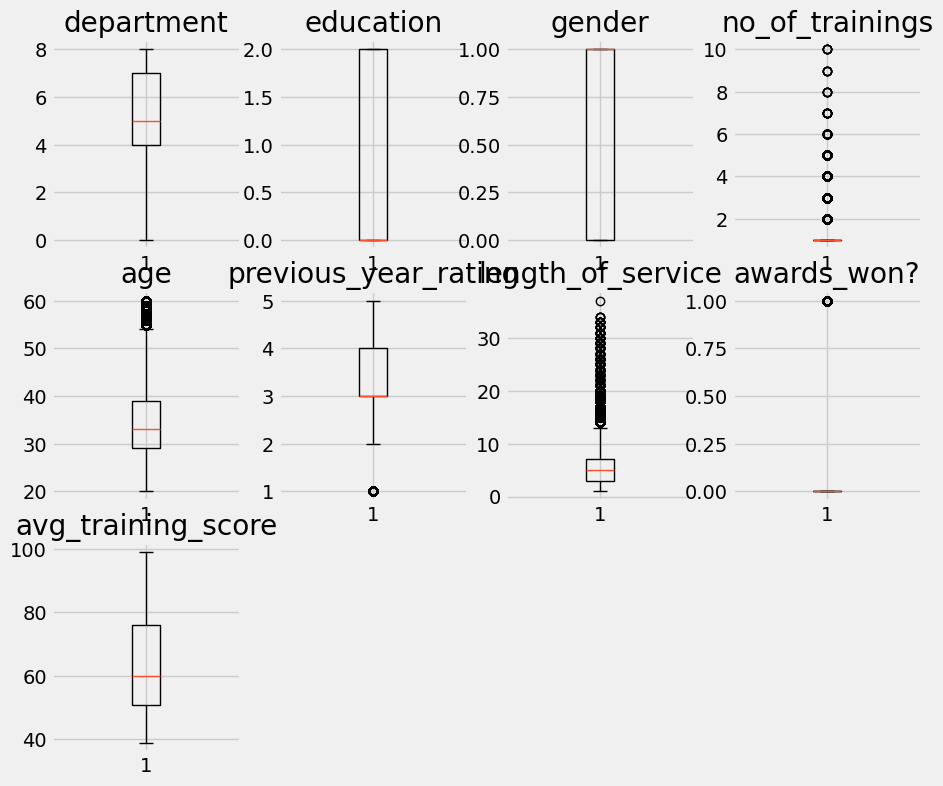

In [77]:
# Melihat outlier tiap kolom 
col=['department', 'education','gender', 'no_of_trainings', 'age','previous_year_rating','length_of_service', 'awards_won?','avg_training_score']
plt.figure(figsize=(10,15))
for i in range(0,len(col)):
   plt.subplot(5, 4, i+1)
   plt.boxplot(train[col[i]])
   plt.title(col[i])

**Data Splitting**

In [78]:
# Split target data dari train 
y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1) 
x_test = test
print(x_test.head(10))

   department  education  gender  no_of_trainings  age  previous_year_rating  \
0           8          0       1                1   24                   3.0   
1           2          0       0                1   31                   3.0   
2           7          0       1                1   31                   1.0   
3           5          0       0                3   31                   2.0   
4           1          0       1                1   30                   4.0   
5           5          0       1                1   36                   3.0   
6           1          0       1                1   33                   5.0   
7           0          0       1                2   36                   3.0   
8           8          2       1                1   51                   4.0   
9           8          0       1                1   29                   5.0   

   length_of_service  awards_won?  avg_training_score  
0                  1            0                  77  
1      

In [79]:
# Melihat shape
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the y : (54808,)
Shape of the x Test : (23490, 9)


In [80]:
# Balancing data yang tadinya imbalanced (resampling) (ML SEBELUM DAN SESUDAH RESAMPLE)
resampler = RandomOverSampler(random_state=1)
X_res,y_res = resampler.fit_resample(x,y)
print(X_res.shape)
print(y_res.value_counts(normalize=True))

(100280, 9)
is_promoted
0    0.5
1    0.5
Name: proportion, dtype: float64


In [81]:
# Print shape setelah resampling
print(X_res.shape) 
print(y_res.shape)

(100280, 9)
(100280,)


In [82]:
# Resampling karena komposisi data imbalanced
print("Before Resampling :") 
print(y.value_counts())

print("After Resampling :")
print(y_res.value_counts())

Before Resampling :
is_promoted
0    50140
1     4668
Name: count, dtype: int64
After Resampling :
is_promoted
0    50140
1    50140
Name: count, dtype: int64


Terlihat bahwa komposisi data sudah balanced

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,random_state=0)
# lets print the shapes again
print("Shape of the x Train :", X_train.shape) 
print("Shape of the y Train :", y_train.shape) 
print("Shape of the x Valid :", X_test.shape) 
print("Shape of the y Valid :", y_train.shape) 
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (75210, 9)
Shape of the y Train : (75210,)
Shape of the x Valid : (25070, 9)
Shape of the y Valid : (75210,)
Shape of the x Test : (23490, 9)


In [84]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
x_test = sc.transform(x_test)

In [85]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [86]:
print (pca.explained_variance_ratio_)

[0.21221132 0.14912405 0.12039629 0.11050511 0.10611448]


# **Decision Tree Classifier**

In [87]:
# Menggunakan Tree Decision
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)
# Prediction test val
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [88]:
print("Training Accuracy :", model.score(X_train, y_train)) 
print("Testing Accuracy :", model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))

Training Accuracy : 0.9870495944688207
Testing Accuracy : 0.9516154766653371
Accuracy: 0.9516154766653371
r2 score:  0.8064544124868116
RMSE:  0.21996482294826813
mean_absolute_error:  0.04838452333466294


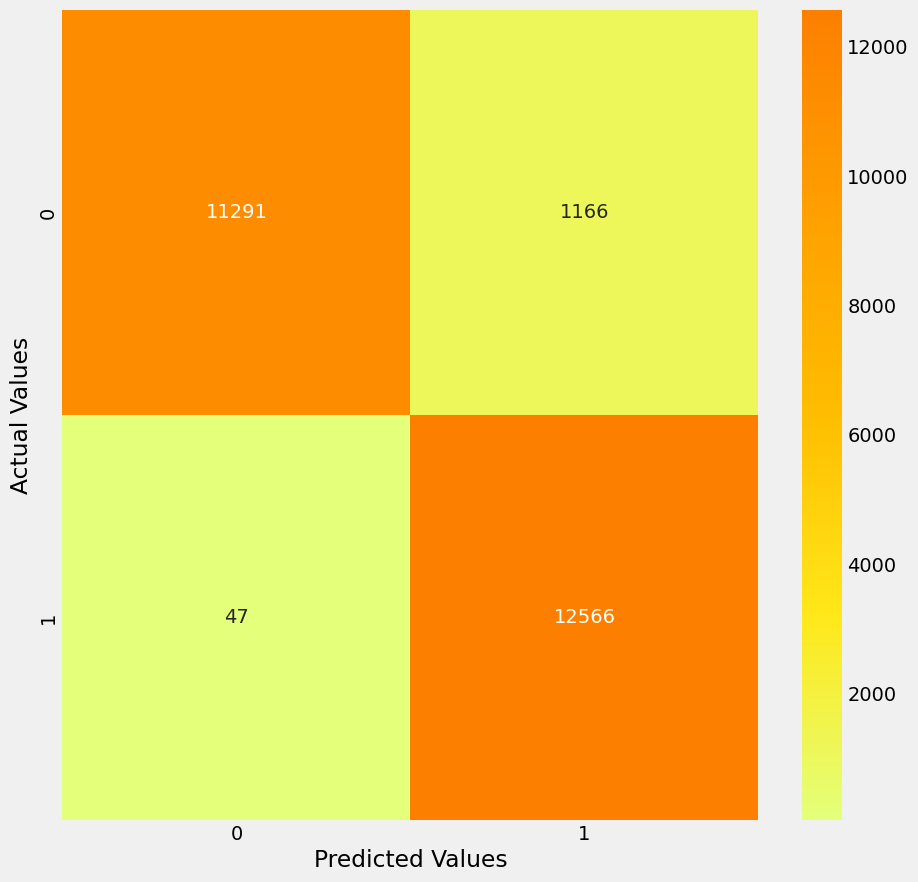

In [89]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g') 
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values') 
plt.show()

# **Logistic Regression**

In [90]:
# Model Development dan Prediction
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(random_state=16)
modelLogistic.fit(X_train, y_train)
# Prediksi values
y_pred = modelLogistic.predict(X_test)

In [91]:
# Evaluasi model menggunakan Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[8342 4115]
 [4343 8270]]


Text(0.5, 885.5555555555555, 'Predicted label')

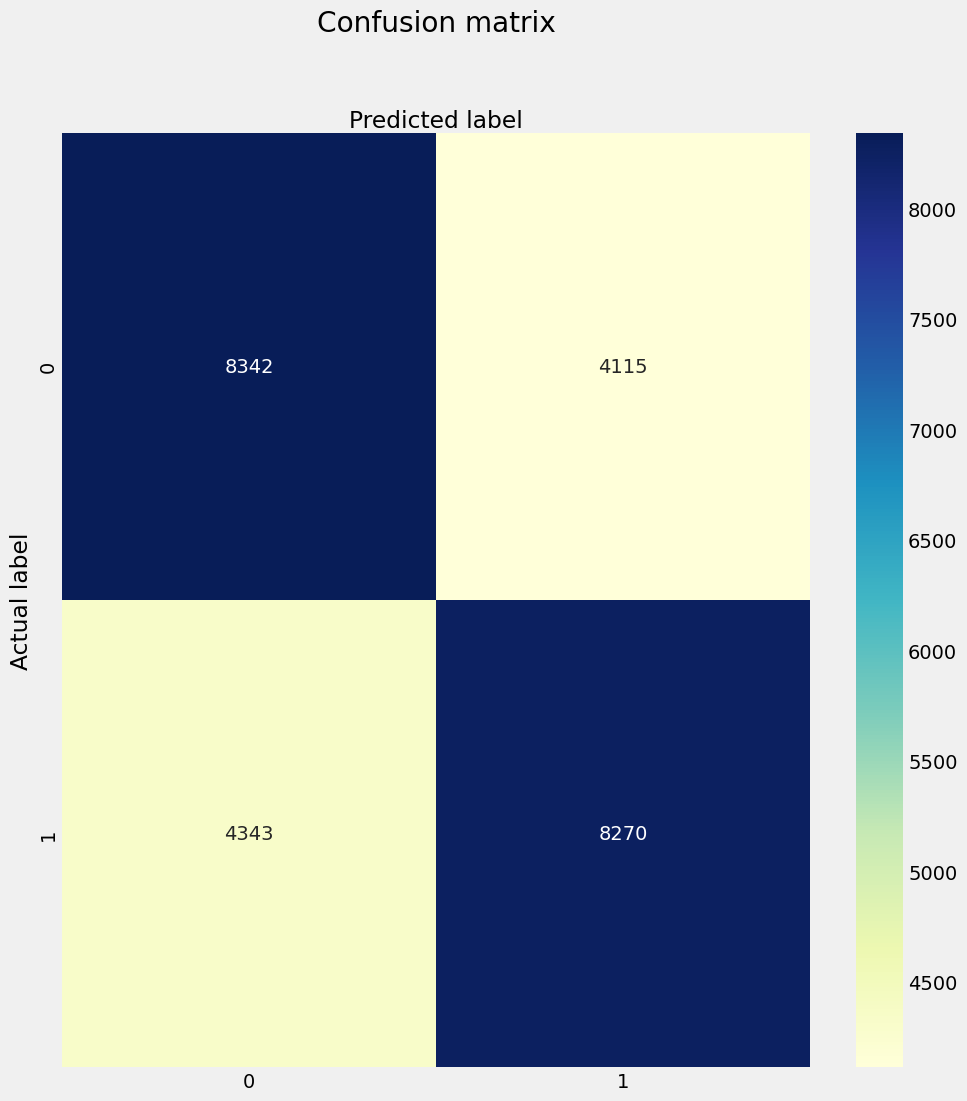

In [92]:
# Confusion matrix menggunakan heatmap
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [93]:
target_names = ['not promoted', 'promoted']
print(classification_report(y_test, y_pred, target_names=target_names))
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

              precision    recall  f1-score   support

not promoted       0.66      0.67      0.66     12457
    promoted       0.67      0.66      0.66     12613

    accuracy                           0.66     25070
   macro avg       0.66      0.66      0.66     25070
weighted avg       0.66      0.66      0.66     25070

r2 score:  -0.34955365143161354
RMSE:  0.5808402095436717


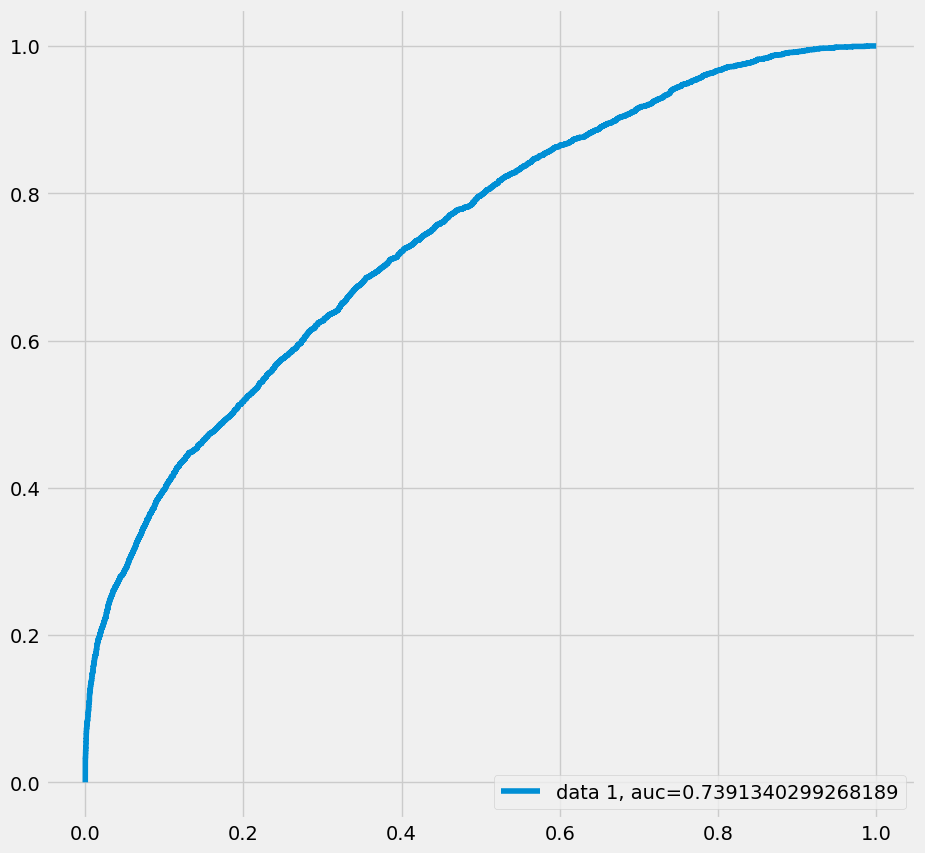

In [94]:
y_pred_proba =modelLogistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Random Forest Model** 

In [95]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [96]:
# Train model menggunakan training set
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [97]:
df = pd.DataFrame(y_pred, columns = ['promotion'])
df

,promotion
0,1
1,1
2,1
3,1
4,1
...,...
25065,1
25066,1
25067,1
25068,1


In [98]:
df.to_csv("Predict_Of_Promotion.csv")

In [99]:
# Akurasi Model
print(classification_report(y_test, y_pred))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))
#print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     12457
           1       0.95      1.00      0.97     12613

    accuracy                           0.97     25070
   macro avg       0.97      0.97      0.97     25070
weighted avg       0.97      0.97      0.97     25070

r2 score:  0.8768201207253244
mean_absolute_error:  0.030793777423215
[[11729   728]
 [   44 12569]]


Text(0.5, 885.5555555555555, 'Predicted label')

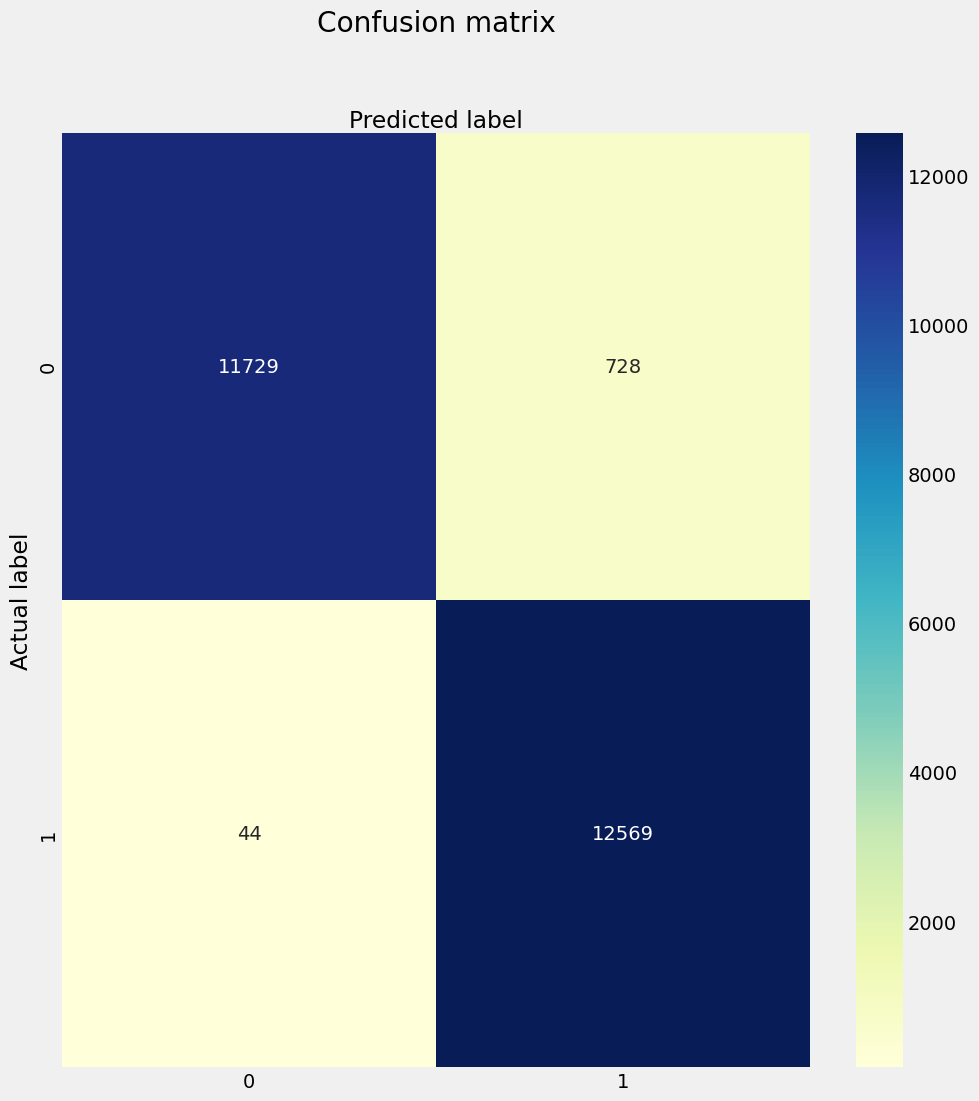

In [100]:
# Confusion matrix menggunakan heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Conclusion & Recommendation**

In [102]:
print(classification_report(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     12457
           1       0.95      1.00      0.97     12613

    accuracy                           0.97     25070
   macro avg       0.97      0.97      0.97     25070
weighted avg       0.97      0.97      0.97     25070

r2 score:  0.8768201207253244
mean_absolute_error:  0.030793777423215
[[11729   728]
 [   44 12569]]


## Conclusion

Berdasarkan hasil classification report dari model terbaik yaitu Random Forest model, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memfilter / menyaring list karyawan yang akan dipromosi, model kita dapat memiliki ketepatan prediksi karyawan yang layak dipromosi sebesar 95% (Precision), jadi setiap model kita memprediksi bahwa seorang karyawan itu layak dipromosi, maka kemungkinan tebakannya benar adalah sebesar 95% kurang lebih. Maka masih akan ada karyawan yang sebenernya tidak layak dipromosi tetapi tetap diprediksi sebagai karyawan yang layak sebesar 0.06% dari keseluruhan karyawan yang tidak layak (Recall).  
- Karyawan berusia antara 26 dan 39 tahun memiliki peluang lebih besar untuk dipromosikan dibandingkan usia lainnya, baik untuk pria maupun wanita.
- Karyawan dengan performance score 3 dan 5 merupakan karyawan yang paling sering dipromosikan. Karyawan dengan nilai 1, 2, dan bahkan 4 tidak dipromosikan sesering mungkin.
- Mengenai tingkat pendidikan; 67% karyawan yang dipromosikan memiliki gelar sarjana, 37% memiliki gelar master, dan 2% memiliki gelar kurang dari sekolah menengah atas. Oleh karena itu, memiliki gelar yang lebih tinggi dari gelar sarjana tidak menjadi faktor penentu untuk dipromosikan.
  
Dari pertanyaan dibawah pun dapat disimpulkan bahwa:
- Karyawan muda memiliki persentase lebih tinggi dalam mendapatkan promosi dibanding karyawan yang sudah berumur.
- Karyawan memiliki peluang 0.076% untuk terpromosi apabila mendapatkan penghargaan (Persentase kecil dikarenakan memang kebanyakan karyawan yang di promosi adalah yang tidak memiliki penghargaan).
- Training Score rata-rata dari karyawan yang dipromosi adalah sebesar 71.
- Karyawan pria memang lebih banyak dalam jumlah, tetapi jika dalam persentase dari keseluruhan gender, wanita lebih unggul dengan persentase sebesar 0.089 sedangkan pria sebesar 0.083 yang terpromosi dari jumlah tiap gender.
- Probabilitas seorang fresh graduate atau yang memiliki pengalaman kurang dari 2 tahun mendapatkan kemungkinan promosi sebesar 8.44%.
  


## Recommendation

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Memilih hanya karyawan yang memiliki `performance score` 3, 4, dan 5 dapat bermanfaat, karena hal ini tidak hanya menyeleksi karyawan yang berkinerja lebih tinggi, namun juga memberikan motivasi bagi karyawan untuk mencapai skor kinerja tersebut.
- Tidak terlalu melihat kriteria untuk dipromosikan dari kolom `age` karena promosi diambil dari semua rentang usia hanya saja paling banyak di usia 26-39 tahun.
- Walaupun jumlah `education` terbanyak ada pada bachelor degree dibandingkan dengan yang masters degree, kedua gelar tersebut harus dianggap sama dikarenakan mungkin jumlah karyawan yang memiliki gelar master lebih sedikit dibandingkan dengan jumlah karyawan yang memiliki gelar bachelor.
- Perusahaan harus hati-hati mengevaluasi kriteria penghargaan karyawan untuk memastikan bahwa kriteria tersebut selaras dengan kriteria promosi. Saat ini karyawan yang tidak mendapatkan penghargaan merupakan 88% dari karyawan yang dipromosikan. Tujuan penghargaan karyawan haruslah untuk memotivasi dan menandakan kinerja yang baik secara umum.
- Menambahkan fitur kolom baru yang dapat membantu data analyst memudahkan filtering datanya seperti jabatan yang dipegang sekarang, dll.
- Coba gunakan model lain dan teknik sampling yang berbeda seperti SMOTE, dll.
- Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.

# **Questions**

**Q1. Apakah Karyawan Senior Mendapatkan Promosi Lebih Daripada Karyawan Junior?**

In [103]:
max_age = train['age'].max()
min_age = train['age'].min()
print('Minimum age is {} and Maximum age is  {}'.format(min_age, max_age))

Minimum age is 20 and Maximum age is  60


In [104]:
# lets consider all the employees under 30 as young and otherwise as old

young_employees = train[train['age'] <= 30]
old_employees = train[train['age'] > 30]

In [105]:
young_employees['is_promoted'].value_counts()

is_promoted
0    16568
1     1550
Name: count, dtype: int64

In [106]:
old_employees['is_promoted'].value_counts()

is_promoted
0    33572
1     3118
Name: count, dtype: int64

In [107]:
perc_young = 1550/(16568+1550)  # young_employees[young_employees['is_promorted'] == 1]/young_employees.shape[0]
perc_old = 3118/(33572+3118)

print(perc_young, perc_old)

0.08555028148802296 0.08498228400109022


**Q2. Probabilitas Karyawan Terpromosi Apabila Mendapatkan Award**

In [108]:
award_wining_employees = train[train['awards_won?'] == 1]
award_wining_employees['is_promoted'].value_counts()

is_promoted
0    711
1    559
Name: count, dtype: int64

In [92]:
probability = 559/(559+711)
print("The Probability of an Employee to get Promotion is : {0:.2f}%".format(probability*100))

The Probability of an Employee to get Promotion is : 44.02%


In [93]:
award_wining_employees = train[train['awards_won?'] == 0]
award_wining_employees['is_promoted'].value_counts()

is_promoted
0    49429
1     4109
Name: count, dtype: int64

In [94]:
x = 4109/(4109+49429)
x

0.0767492248496395

**Q3. Average Training Score Dari Karyawan Yang Terpromosi**

In [96]:
promoted_employees = train[train['is_promoted'] == 1]
avg_training_score_promoted_emp = promoted_employees['avg_training_score'].mean()
print("The Average Training Score for the Employees who got Promotion is {0:.0f}".format(avg_training_score_promoted_emp))

The Average Training Score for the Employees who got Promotion is 71


**Q4. Impact Gender Dalam Promotions**

In [99]:
train['gender'].value_counts()

gender
1    38496
0    16312
Name: count, dtype: int64

In [100]:
promoted_employees['gender'].value_counts()

gender
1    3201
0    1467
Name: count, dtype: int64

In [101]:
m_prom = 3201/38496
f_prom = 1467/16312
print(m_prom, f_prom)

0.08315149625935161 0.08993379107405591


**Q5. Probabilitas Fresher Mendapatkan Promosi (<= 2 Tahun)**

In [103]:
freshers = train[(train['length_of_service'] <= 2) & (train['age'] <= 30)]
freshers['is_promoted'].value_counts()

is_promoted
0    8057
1     743
Name: count, dtype: int64

In [104]:
prob = 743/(8057+743)
print("Probability of a Fresher being Promoted is {0:.2f}%".format(prob*100))

Probability of a Fresher being Promoted is 8.44%
